In [1]:
from aitools.llm import LLMHelper
import base64
extractor = LLMHelper()

In [8]:
with open('pril-9-regl.pdf', "rb") as f:
    document_base64 = base64.b64encode(f.read()).decode("utf-8")

In [13]:
res = await extractor.get_doc_data(document_base64=document_base64)

In [14]:
res

['Приложение № 9 к РЕГЛАМЕНТУ о порядке заключения гражданско-правовых договоров в ФГАОУ ВО «Крымский федеральный университет им. В.И. Вернадского» Договор на выполнение работ, в котором Университет выступает в качестве Заказчика, г. Симферополь «____» ______________ 20__ г.',
 'Федеральное государственное автономное образовательное учреждение высшего образования «Крымский федеральный университет имени В. И. Вернадского», в лице __________________________________, действующего на основании __________________________, именуемое в дальнейшем «Заказчик», с одной стороны, и ___________________________________________________________, в лице ____________________________________, действующего на основании _____________, именуемое в дальнейшем «Подрядчик», с другой стороны, совместно именуемые «Стороны», заключили настоящий договор на выполнение работ (далее «Договор») о нижеследующем:',
 '1. ПРЕДМЕТ ДОГОВОРА',
 '1.1. Подрядчик обязуется по заданию Заказчика выполнить работы по ______________

In [4]:
with open('Закон КР от 14 ноября 2025 года № 257 О внесении изменений в некоторые законодательные акты Кыргызской Республики в сфере медиации.pdf', "rb") as f:
    document_base64 = base64.b64encode(f.read()).decode("utf-8")

In [5]:
res2 = await extractor.get_legal_doc_data(document_base64=document_base64)

In [7]:
res2.title

'Закон КР от 14 ноября 2025 года № 257 "О внесении изменений в некоторые законодательные акты Кыргызской Республики в сфере медиации"'

In [8]:
res2.accepted_date

'25 сентября 2025 года'

In [9]:
res2.articles

[Articles(article='Статья 1. Внести в Гражданский процессуальный кодекс Кыргызской Республики (Ведомости Жогорку Кенеша Кыргызской Республики, 2017 г., № 1 (2), ст.14) следующие изменения: 1) статью 37 дополнить частью 11 следующего содержания: "11. Стороны обязаны являться на медиативную информационную встречу."; 2) статью 106 дополнить частью 21 следующего содержания: "21. Лицо, подающее заявление или жалобу, вправе ходатайствовать об отсрочке уплаты половины суммы государственной пошлины, подлежащей оплате в соответствующей судебной инстанции, при наличии намерения разрешить спор путем применения медиации. В этом случае к заявлению или жалобе прилагается ходатайство о намерении разрешить спор путем применения медиации."; 3) пункт 3 части 1 статьи 108 после цифр "1-5," дополнить цифрами "71,"; 4) статью 135 дополнить пунктом 21 следующего содержания: "21) ходатайство об отсрочке уплаты половины суммы государственной пошлины, подлежащей оплате, при наличии намерения разрешить спор пут

In [ ]:
res3 = await extractor.get_llm_questions(
    'Я случайно уронил в магазине товар, и он разбился. Магазин требует с меня деньги за товар. Законно ли это?', 
    top_k=10
)

In [5]:
res3

['Гражданский кодекс Кыргызской Республики ответственность за вред имуществу',
 'ГК Кыргызской Республики порча чужого имущества возмещение убытков',
 'Гражданский кодекс Кыргызской Республики договор купли-продажи порча товара',
 'Кыргызская Республика Закон о защите прав потребителей ответственность продавца',
 'защита прав потребителей порча товара до покупки',
 'ответственность покупателя за повреждение товара в магазине',
 'размер ущерба при порче товара в магазине Кыргызская Республика',
 'доказательства порчи товара в магазине (письменные доказательства, свидетели)',
 'как определить виновность за порчу товара в магазине',
 'правовые последствия порчи товара в торговой точке']

In [2]:
import json
import random

# Загрузка статей из JSON
def load_articles_from_json(file_path):
    articles = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line and not line.endswith(','):
                articles.append(json.loads(line))
            elif line.endswith(','):
                articles.append(json.loads(line[:-1]))
    return articles

# Загрузка обеих баз
ru_articles = load_articles_from_json('law_rag_db.json')

# Случайная выборка 100 статей
random_100 = random.sample(ru_articles, 100)

# Удаление векторов из каждой статьи
for article in random_100:
    article.pop('vector', None)  # Удаляет поле 'vector', если оно есть
    #article.pop('id', None)      # Удаляет поле 'id', если оно есть

# Сохранение в файл
with open('benchmark_100_questions.json', 'w', encoding='utf-8') as f:
    json.dump(random_100, f, ensure_ascii=False, indent=2)

print(f"Выбрано {len(random_100)} статей")

Выбрано 100 статей


In [3]:
question_list = []
with open('benchmark.json', 'r', encoding='utf-8') as f:
    question_list = json.load(f)

answers_list = []
with open('benchmark_answers.json', 'r', encoding='utf-8') as f:
    answers_list = json.load(f)

print(f"Вопросов: {len(question_list)}")
print(f"Ответов: {len(answers_list)}")

Вопросов: 100
Ответов: 100


In [4]:
import pandas as pd

answers_df = pd.DataFrame(answers_list)
questions_df = pd.DataFrame(question_list)

answers_df['question'] = questions_df['question']
answers_df.head()

,id,source_doc,section,chapter,article_title,article_text,question
0,3376,Кодекс КР от 28 октября 2021 года № 128 Кодекс...,РАЗДЕЛ IX,Глава 45. Правонарушения против порядка управл...,Статья 425. Нарушение правил несения караульно...,Статья 425. Нарушение правил несения караульно...,Какое наказание предусмотрено Кодексом о право...
1,2210,Кодекс КР от 25 января 2017 года № 14 Гражданс...,РАЗДЕЛ II. ПРОИЗВОДСТВО В СУДЕ ПЕРВОЙ ИНСТАНЦИИ,Глава 19. Прекращение производства по делу,Статья 220. Основания прекращения производства...,Статья 220. Основания прекращения производства...,В каких случаях суд обязан прекратить производ...
2,4450,Налоговый кодекс Кыргызской Республики от 18 я...,РАЗДЕЛ III. НАЛОГОВОЕ ОБЯЗАТЕЛЬСТВО И НАЛОГОВА...,Глава 11. Налоговая отчетность,Статья 106. Единая налоговая декларация,Статья 106. Единая налоговая декларация\n1. Ед...,Кто обязан представлять Единую налоговую декла...
3,1345,Кодекс КР от 18 июля 2025 года № 149 Земельный...,РАЗДЕЛ II. ПРАВО НА ЗЕМЕЛЬНЫЙ УЧАСТОК КАК ОБЪЕ...,Глава 3. Право на земельный участок как объект...,Статья 41. Ограничения ипотеки права на земель...,Статья 41. Ограничения ипотеки права на земель...,Допускается ли ипотека права на часть земельно...
4,2588,Кодекс КР от 28 октября 2021 года № 127 Уголов...,РАЗДЕЛ VI,Глава 22. Преступления в сфере медицинского и ...,Статья 151. Насильственное донорство,Статья 151. Насильственное донорство\n1. Насил...,Какая ответственность предусмотрена за насильс...


In [5]:
from databases import milvus_db as db
import aitools.embedder as Embedder
searcher = db.MilvusLawSearcher()
embedder = Embedder.QueryEmbedder()
vec = embedder.encode_queries(answers_df.iloc[0]['question'])
res = searcher.search_similar_laws(vec, top_k=5)
res

[{'distance': 0.6850515604019165,
  'path': 'Source: Кодекс КР от 28 октября 2021 года № 128 Кодекс Кыргызской Республики о правонарушениях.docx\nSection: РАЗДЕЛ IX\nChapter: Глава 45. Правонарушения против порядка управления в сфере обеспечения военной безопасности\nTitle: Статья 425. Нарушение правил несения караульной службы',
  'text': 'Статья 425. Нарушение правил несения караульной службы\nУмышленное или неосторожное нарушение уставных правил несения караульной (вахтенной) службы, совершенное лицом, входящим в состав караула (вахты), причинившее по неосторожности менее тяжкий вред здоровью, –\nвлечет применение ареста от трех до пяти суток.'},
 {'distance': 0.6742316484451294,
  'path': 'Source: Кодекс КР от 28 октября 2021 года № 127 Уголовный кодекс Кыргызской Республики.docx\nSection: РАЗДЕЛ X\nChapter: Глава 48. Преступления против порядка подчинения и соблюдения воинской чести\nTitle: Статья 394. Нарушение правил несения караульной службы',
  'text': 'Статья 394. Нарушение п

In [6]:
def calculate_recall_at_k(retrieved_results: list, relevant_text: str, k: int = 5) -> float:
    """
    Вычисляет Recall@K - проверяет наличие релевантного текста среди top-K результатов.
    
    Args:
        retrieved_results: список результатов поиска из Milvus
        relevant_text: текст релевантной статьи
        k: количество топ результатов для оценки
    
    Returns:
        1.0 если релевантный текст найден в top-K, иначе 0.0
    """
    top_k_results = retrieved_results[:k]
    
    for result in top_k_results:
        retrieved_text = result.get('text', '').strip()
        if retrieved_text == relevant_text.strip():
            return 1.0
    
    return 0.0


def calculate_mrr(retrieved_results: list, relevant_text: str) -> float:
    """
    Вычисляет MRR - обратный ранг первого релевантного документа.
    
    Args:
        retrieved_results: список результатов поиска из Milvus
        relevant_text: текст релевантной статьи
    
    Returns:
        1/rank если документ найден, иначе 0.0
    """
    for rank, result in enumerate(retrieved_results, start=1):
        retrieved_text = result.get('text', '').strip()
        if retrieved_text == relevant_text.strip():
            return 1.0 / rank
    
    return 0.0


def evaluate_rag_system(answers_df: pd.DataFrame, searcher, embedder, top_k: int = 5):
    """
    Оценивает RAG-систему на всем датасете.
    
    Args:
        answers_df: DataFrame с вопросами и текстами статей
        searcher: объект поиска в Milvus
        embedder: объект для создания эмбеддингов
        top_k: количество результатов для поиска
    
    Returns:
        dict с метриками: recall@k и MRR
    """
    recall_scores = []
    mrr_scores = []
    
    for idx, row in answers_df.iterrows():
        # Получаем эмбеддинг вопроса
        vec = embedder.encode_queries(row['question'])
        
        # Ищем похожие статьи
        results = searcher.search_similar_laws(vec, top_k=top_k)
        
        # Правильный текст статьи из датасета
        relevant_text = row['article_text']
        
        # Вычисляем метрики
        recall_scores.append(calculate_recall_at_k(results, relevant_text, k=top_k))
        mrr_scores.append(calculate_mrr(results, relevant_text))
        
        if (idx + 1) % 10 == 0:
            print(f"Обработано {idx + 1}/{len(answers_df)} запросов...")
    
    return {
        f'recall@{top_k}': sum(recall_scores) / len(recall_scores),
        'mrr': sum(mrr_scores) / len(mrr_scores),
        'total_queries': len(answers_df)
    }

In [7]:
# Оценка системы
metrics = evaluate_rag_system(answers_df, searcher, embedder, top_k=5)
print(f"\nРезультаты оценки:")
print(f"Recall@5: {metrics['recall@5']:.4f}")
print(f"MRR: {metrics['mrr']:.4f}")
print(f"Всего запросов: {metrics['total_queries']}")

Обработано 10/100 запросов...
Обработано 20/100 запросов...
Обработано 30/100 запросов...
Обработано 40/100 запросов...
Обработано 50/100 запросов...
Обработано 60/100 запросов...
Обработано 70/100 запросов...
Обработано 80/100 запросов...
Обработано 90/100 запросов...
Обработано 100/100 запросов...

Результаты оценки:
Recall@5: 0.9700
MRR: 0.8957
Всего запросов: 100


In [30]:
# Оценка системы
metrics = evaluate_rag_system(answers_df, searcher, embedder, top_k=50)
print(f"\nРезультаты оценки:")
print(f"Recall@50: {metrics['recall@50']:.4f}")
print(f"MRR: {metrics['mrr']:.4f}")
print(f"Всего запросов: {metrics['total_queries']}")

Обработано 10/100 запросов...
Обработано 20/100 запросов...
Обработано 30/100 запросов...
Обработано 40/100 запросов...
Обработано 50/100 запросов...
Обработано 60/100 запросов...
Обработано 70/100 запросов...
Обработано 80/100 запросов...
Обработано 90/100 запросов...
Обработано 100/100 запросов...

Результаты оценки:
Recall@50: 0.9900
MRR: 0.8967
Всего запросов: 100


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def evaluate_rag_system_with_details(answers_df: pd.DataFrame, searcher, embedder, top_k: int = 5):
    """
    Evaluates RAG system with detailed information for charts.
    
    Returns:
        dict with metrics and detailed data
    """
    recall_scores = []
    mrr_scores = []
    ranks = []  # Ranks of found documents
    
    for idx, row in answers_df.iterrows():
        vec = embedder.encode_queries(row['question'])
        results = searcher.search_similar_laws(vec, top_k=top_k)
        relevant_text = row['article_text']
        
        # Recall
        recall = calculate_recall_at_k(results, relevant_text, k=top_k)
        recall_scores.append(recall)
        
        # MRR and rank
        mrr = calculate_mrr(results, relevant_text)
        mrr_scores.append(mrr)
        
        # Find rank
        rank_found = None
        for rank, result in enumerate(results, start=1):
            if result.get('text', '').strip() == relevant_text.strip():
                rank_found = rank
                break
        ranks.append(rank_found if rank_found else top_k + 1)
        
        if (idx + 1) % 10 == 0:
            print(f"Processed {idx + 1}/{len(answers_df)} queries...")
    
    return {
        f'recall@{top_k}': sum(recall_scores) / len(recall_scores),
        'mrr': sum(mrr_scores) / len(mrr_scores),
        'total_queries': len(answers_df),
        'recall_scores': recall_scores,
        'mrr_scores': mrr_scores,
        'ranks': ranks
    }


def plot_rag_metrics(metrics, top_k):
    """
    Plots RAG system metrics.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Distribution of ranks of found documents
    ranks = [r for r in metrics['ranks'] if r <= top_k]
    axes[0, 0].hist(ranks, bins=range(1, top_k + 2), edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Rank of Relevant Document')
    axes[0, 0].set_ylabel('Number of Queries')
    axes[0, 0].set_title('Distribution of Found Document Ranks')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Cumulative Recall@K
    recall_at_k_values = []
    k_values = range(1, top_k + 1)
    for k in k_values:
        recall_k = sum(1 for r in metrics['ranks'] if r <= k) / len(metrics['ranks'])
        recall_at_k_values.append(recall_k)
    
    axes[0, 1].plot(k_values, recall_at_k_values, marker='o', linewidth=2)
    axes[0, 1].set_xlabel('K (Number of Results)')
    axes[0, 1].set_ylabel('Recall@K')
    axes[0, 1].set_title('Recall@K vs K')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim([0, 1.05])
    
    # 3. Distribution of MRR scores
    axes[1, 0].hist(metrics['mrr_scores'], bins=30, edgecolor='black', alpha=0.7, color='green')
    axes[1, 0].set_xlabel('MRR Score')
    axes[1, 0].set_ylabel('Number of Queries')
    axes[1, 0].set_title('MRR Distribution')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Summary table of metrics
    axes[1, 1].axis('off')
    summary_text = f"""
    RAG System Metrics Summary
    {'=' * 40}
    
    Recall@{top_k}: {metrics[f'recall@{top_k}']:.4f}
    MRR: {metrics['mrr']:.4f}
    
    Total queries: {metrics['total_queries']}
    Found in Top-{top_k}: {sum(metrics['recall_scores'])} ({sum(metrics['recall_scores'])/metrics['total_queries']*100:.1f}%)
    Not found: {metrics['total_queries'] - sum(metrics['recall_scores'])} ({(metrics['total_queries'] - sum(metrics['recall_scores']))/metrics['total_queries']*100:.1f}%)
    
    Average rank (found): {np.mean([r for r in metrics['ranks'] if r <= top_k]):.2f}
    Median rank (found): {np.median([r for r in metrics['ranks'] if r <= top_k]):.0f}
    """
    axes[1, 1].text(0.1, 0.5, summary_text, fontsize=12, family='monospace',
                    verticalalignment='center')
    
    plt.tight_layout()
    plt.savefig('rag_evaluation_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nCharts saved to file: rag_evaluation_metrics.png")

Обработано 10/100 запросов...
Обработано 20/100 запросов...
Обработано 30/100 запросов...
Обработано 40/100 запросов...
Обработано 50/100 запросов...
Обработано 60/100 запросов...
Обработано 70/100 запросов...
Обработано 80/100 запросов...
Обработано 90/100 запросов...
Обработано 100/100 запросов...

Результаты оценки:
Recall@50: 0.9900
MRR: 0.8967
Всего запросов: 100


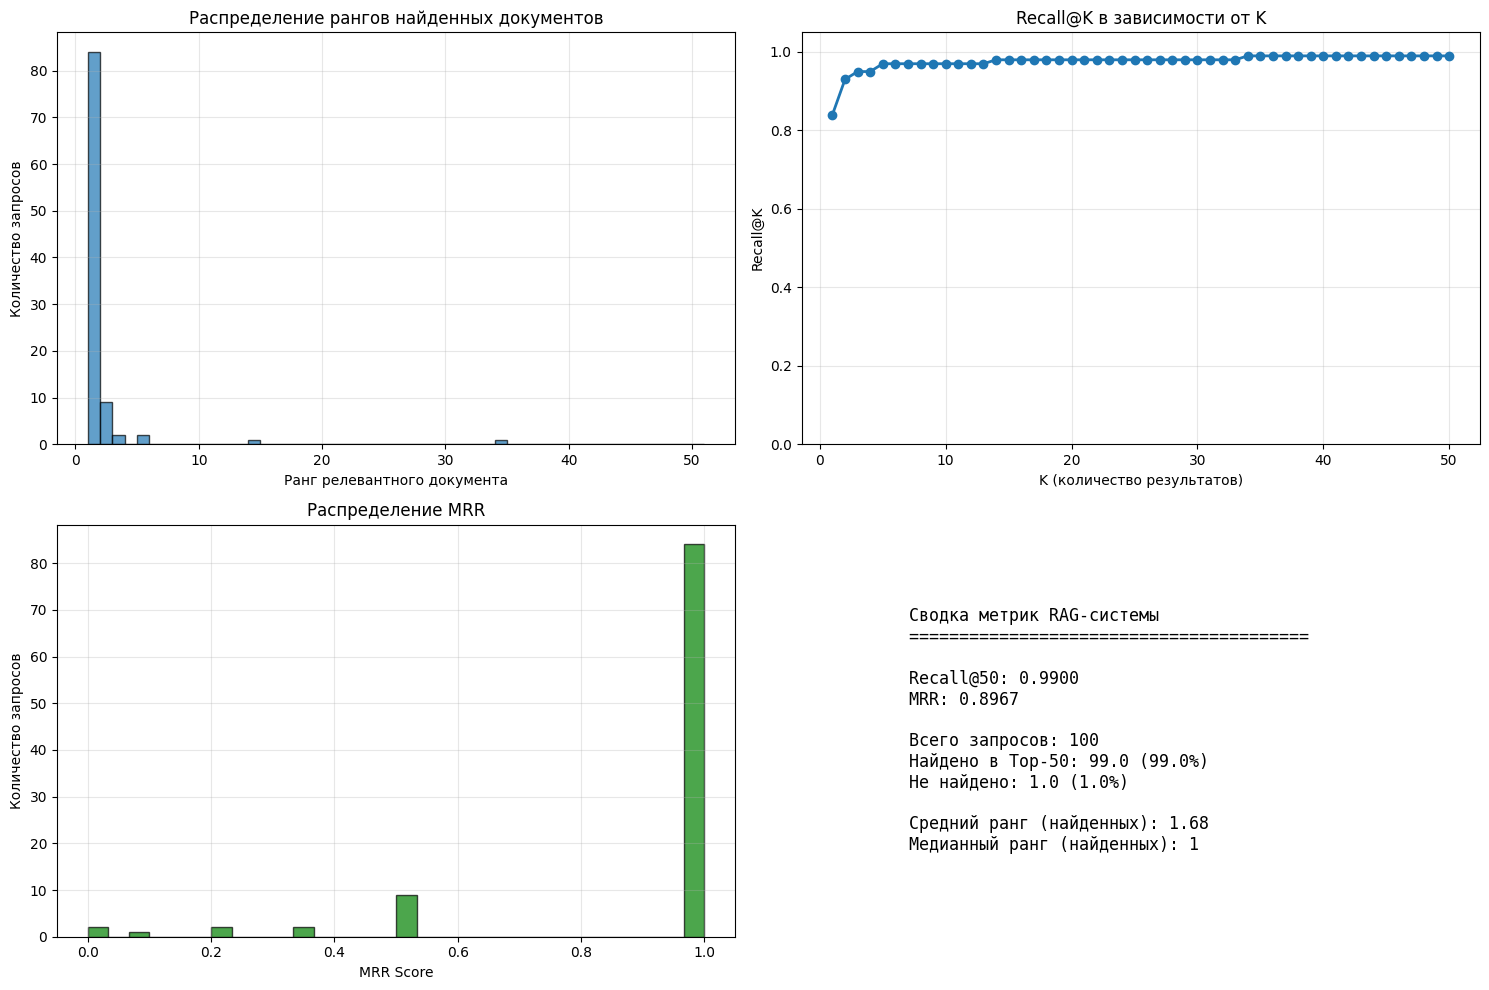


Графики сохранены в файл: rag_evaluation_metrics.png


In [32]:
# Оценка системы с детальными данными
metrics = evaluate_rag_system_with_details(answers_df, searcher, embedder, top_k=50)

print(f"\nРезультаты оценки:")
print(f"Recall@50: {metrics['recall@50']:.4f}")
print(f"MRR: {metrics['mrr']:.4f}")
print(f"Всего запросов: {metrics['total_queries']}")

# Построение графиков
plot_rag_metrics(metrics, top_k=50)

Обработано 10/100 запросов...
Обработано 20/100 запросов...
Обработано 30/100 запросов...
Обработано 40/100 запросов...
Обработано 50/100 запросов...
Обработано 60/100 запросов...
Обработано 70/100 запросов...
Обработано 80/100 запросов...
Обработано 90/100 запросов...
Обработано 100/100 запросов...

Результаты оценки:
Recall@5: 0.9700
MRR: 0.8957
Всего запросов: 100


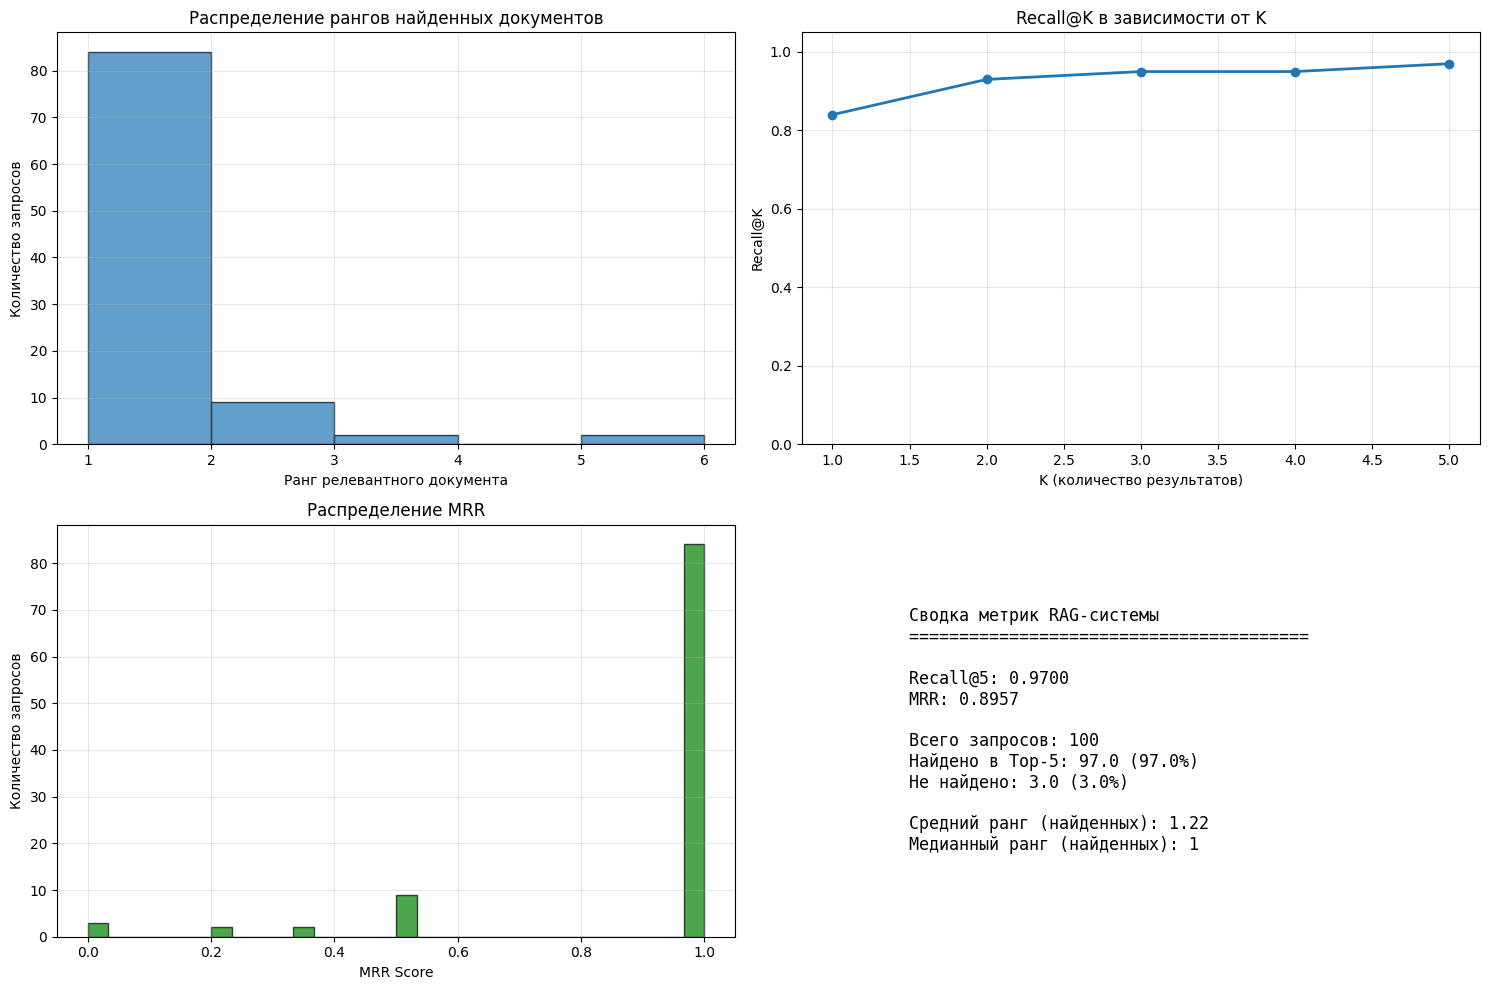


Графики сохранены в файл: rag_evaluation_metrics.png


In [9]:
# Оценка системы с детальными данными
metrics = evaluate_rag_system_with_details(answers_df, searcher, embedder, top_k=5)

print(f"\nРезультаты оценки:")
print(f"Recall@5: {metrics['recall@5']:.4f}")
print(f"MRR: {metrics['mrr']:.4f}")
print(f"Всего запросов: {metrics['total_queries']}")

# Построение графиков
plot_rag_metrics(metrics, top_k=5)

In [34]:
def analyze_errors(answers_df: pd.DataFrame, searcher, embedder, top_k: int = 5):
    """
    Анализирует случаи, когда система не нашла релевантный документ.
    
    Returns:
        DataFrame с ошибками
    """
    errors = []
    
    for idx, row in answers_df.iterrows():
        vec = embedder.encode_queries(row['question'])
        results = searcher.search_similar_laws(vec, top_k=top_k)
        relevant_text = row['article_text']
        
        # Проверяем, найден ли релевантный документ
        found = False
        rank_found = None
        
        for rank, result in enumerate(results, start=1):
            if result.get('text', '').strip() == relevant_text.strip():
                found = True
                rank_found = rank
                break
        
        # Если не найден, сохраняем информацию об ошибке
        if not found:
            errors.append({
                'index': idx,
                'question': row['question'],
                'expected_article': row['article_title'],
                'expected_text': relevant_text[:200] + '...',
                'top_result_title': results[0].get('path', 'N/A') if results else 'N/A',
                'top_result_text': results[0].get('text', 'N/A')[:200] + '...' if results else 'N/A',
                'distance': results[0].get('distance', 'N/A') if results else 'N/A'
            })
    
    errors_df = pd.DataFrame(errors)
    print(f"\nВсего ошибок: {len(errors)} из {len(answers_df)} ({len(errors)/len(answers_df)*100:.1f}%)")
    
    return errors_df


def show_error_details(errors_df: pd.DataFrame, error_index: int = 0):
    """
    Показывает детальную информацию об ошибке.
    
    Args:
        errors_df: DataFrame с ошибками
        error_index: индекс ошибки для просмотра
    """
    if error_index >= len(errors_df):
        print(f"Ошибка с индексом {error_index} не найдена")
        return
    
    error = errors_df.iloc[error_index]
    
    print("=" * 80)
    print(f"ОШИБКА #{error_index + 1}")
    print("=" * 80)
    print(f"\n📝 ВОПРОС:")
    print(f"{error['question']}\n")
    
    print(f"✅ ОЖИДАЕМАЯ СТАТЬЯ:")
    print(f"{error['expected_article']}")
    print(f"Текст: {error['expected_text']}\n")
    
    print(f"❌ НАЙДЕННАЯ СТАТЬЯ (топ-1):")
    print(f"{error['top_result_title']}")
    print(f"Текст: {error['top_result_text']}")
    print(f"Расстояние: {error['distance']}")
    print("=" * 80)

In [10]:
def analyze_errors_from_metrics(answers_df: pd.DataFrame, metrics: dict, searcher, embedder, top_k: int = 5):
    """
    Анализирует ошибки на основе уже вычисленных метрик (БЕЗ повторных запросов).
    
    Args:
        answers_df: DataFrame с вопросами и текстами статей
        metrics: результат evaluate_rag_system_with_details
        searcher: объект поиска в Milvus
        embedder: объект для создания эмбеддингов
        top_k: количество результатов для поиска
    
    Returns:
        DataFrame с ошибками
    """
    errors = []
    
    # Находим индексы, где recall = 0 (документ не найден)
    error_indices = [i for i, recall in enumerate(metrics['recall_scores']) if recall == 0]
    
    print(f"Анализ {len(error_indices)} ошибок...")
    
    for i, idx in enumerate(error_indices):
        row = answers_df.iloc[idx]
        
        # Делаем запрос только для ошибочных случаев
        vec = embedder.encode_queries(row['question'])
        results = searcher.search_similar_laws(vec, top_k=top_k)
        
        errors.append({
            'index': idx,
            'question': row['question'],
            'expected_article': row['article_title'],
            'expected_text': row['article_text'][:200] + '...',
            'top_result_title': results[0].get('path', 'N/A') if results else 'N/A',
            'top_result_text': results[0].get('text', 'N/A')[:200] + '...' if results else 'N/A',
            'distance': results[0].get('distance', 'N/A') if results else 'N/A'
        })
        
        if (i + 1) % 10 == 0:
            print(f"Обработано {i + 1}/{len(error_indices)} ошибок...")
    
    errors_df = pd.DataFrame(errors)
    print(f"\n✅ Всего ошибок: {len(errors)} из {len(answers_df)} ({len(errors)/len(answers_df)*100:.1f}%)")
    
    return errors_df


# Использование:
errors_df = analyze_errors_from_metrics(answers_df, metrics, searcher, embedder, top_k=5)

if len(errors_df) > 0:
    print("\nПервые 10 ошибок:")
    display(errors_df.head(10))
    
    print("\n" + "="*80)
    print("ДЕТАЛЬНЫЙ ПРОСМОТР ПЕРВОЙ ОШИБКИ:")
    show_error_details(errors_df, error_index=0)
    
    errors_df.to_csv('rag_errors.csv', index=False, encoding='utf-8')
    print(f"\n✅ Ошибки сохранены в файл: rag_errors.csv")

Анализ 3 ошибок...

✅ Всего ошибок: 3 из 100 (3.0%)

Первые 10 ошибок:


,index,question,expected_article,expected_text,top_result_title,top_result_text,distance
0,30,Обязательна ли письменная форма для соглашения...,Статья 354. Понятие задатка. Форма соглашения ...,Статья 354. Понятие задатка. Форма соглашения ...,Source: Кодекс КР Гражданский кодекс Кыргызско...,Статья 322. Форма соглашения о неустойке\nСогл...,0.574777
1,93,"Имеют ли обратную силу законы, устанавливающие...",Статья 18,Статья 18\n1. Государственный бюджет Кыргызско...,Source: Налоговый кодекс Кыргызской Республики...,Статья 15. Действие налогового законодательств...,0.606964
2,98,В чью собственность переходит выморочное имуще...,Статья 1166. Выморочное имущество,Статья 1166. Выморочное имущество\n1. Если нет...,Source: Кодекс КР Гражданский кодекс Кыргызско...,Статья 621. Изменение сторон в договоре безвоз...,0.504146



ДЕТАЛЬНЫЙ ПРОСМОТР ПЕРВОЙ ОШИБКИ:


NameError: name 'show_error_details' is not defined